ex1-2

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("household_power_consumption.txt",sep=';',na_values=['?'])

print(df.head())

print(df.info())
print("Shape:", df.shape)

Saving household_power_consumption.txt to household_power_consumption.txt
         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
<class 'pandas.core.frame

In [9]:
print(df.isnull().sum())

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [10]:
# Выбираем только числовые колонки
num_cols = df.select_dtypes(include=[np.number]).columns

# Для них считаем среднее и заполняем пропуски
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Проверяем результат
print(df.isnull().sum())

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [11]:
# Объединяем Date и Time в один столбец Datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)

# Проверяем результат — выводим первые 5 строк
print(df[['Date', 'Time', 'Datetime']].head())


         Date      Time            Datetime
0  16/12/2006  17:24:00 2006-12-16 17:24:00
1  16/12/2006  17:25:00 2006-12-16 17:25:00
2  16/12/2006  17:26:00 2006-12-16 17:26:00
3  16/12/2006  17:27:00 2006-12-16 17:27:00
4  16/12/2006  17:28:00 2006-12-16 17:28:00


In [12]:
df.set_index('Datetime', inplace=True)

In [13]:
# Показать первые 5 строк с новым индексом
print(df.head())

# Проверить индекс отдельно
print(df.index)

                           Date      Time  Global_active_power  \
Datetime                                                         
2006-12-16 17:24:00  16/12/2006  17:24:00                4.216   
2006-12-16 17:25:00  16/12/2006  17:25:00                5.360   
2006-12-16 17:26:00  16/12/2006  17:26:00                5.374   
2006-12-16 17:27:00  16/12/2006  17:27:00                5.388   
2006-12-16 17:28:00  16/12/2006  17:28:00                3.666   

                     Global_reactive_power  Voltage  Global_intensity  \
Datetime                                                                
2006-12-16 17:24:00                  0.418   234.84              18.4   
2006-12-16 17:25:00                  0.436   233.63              23.0   
2006-12-16 17:26:00                  0.498   233.29              23.0   
2006-12-16 17:27:00                  0.502   233.74              23.0   
2006-12-16 17:28:00                  0.528   235.68              15.8   

                     Sub_

ex3

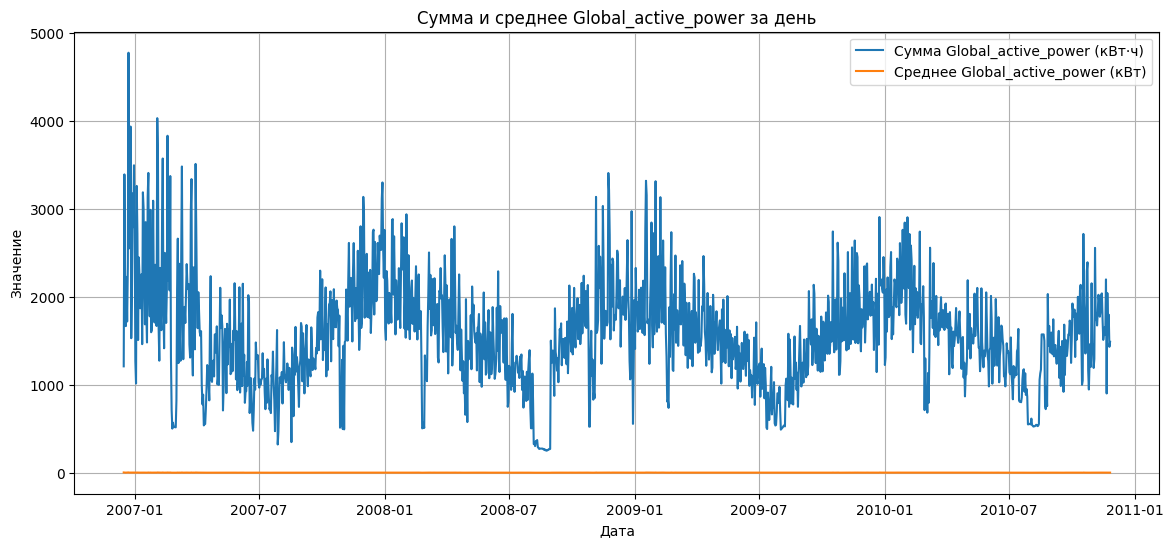

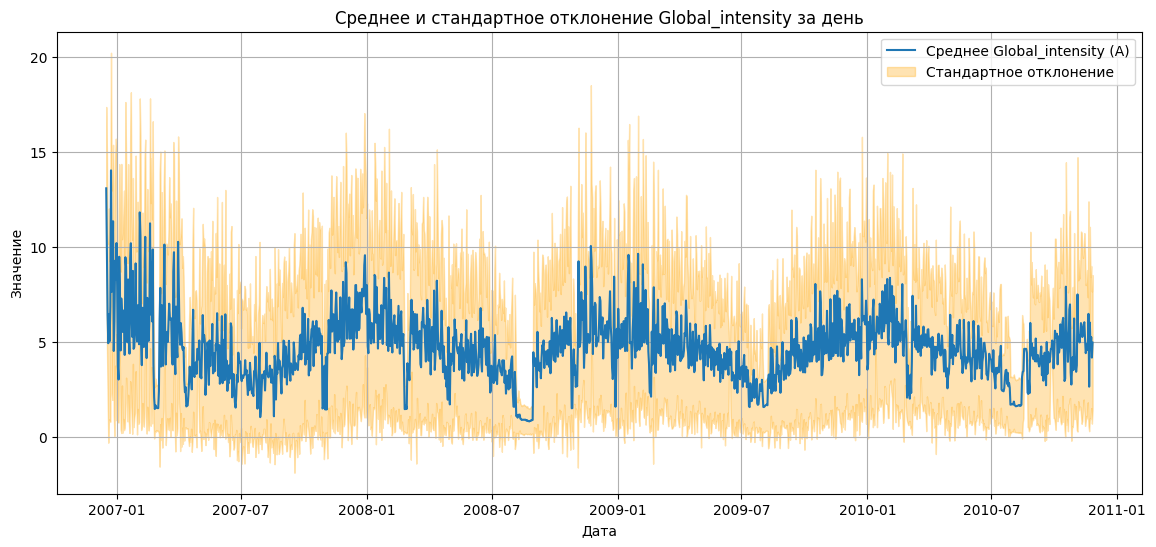

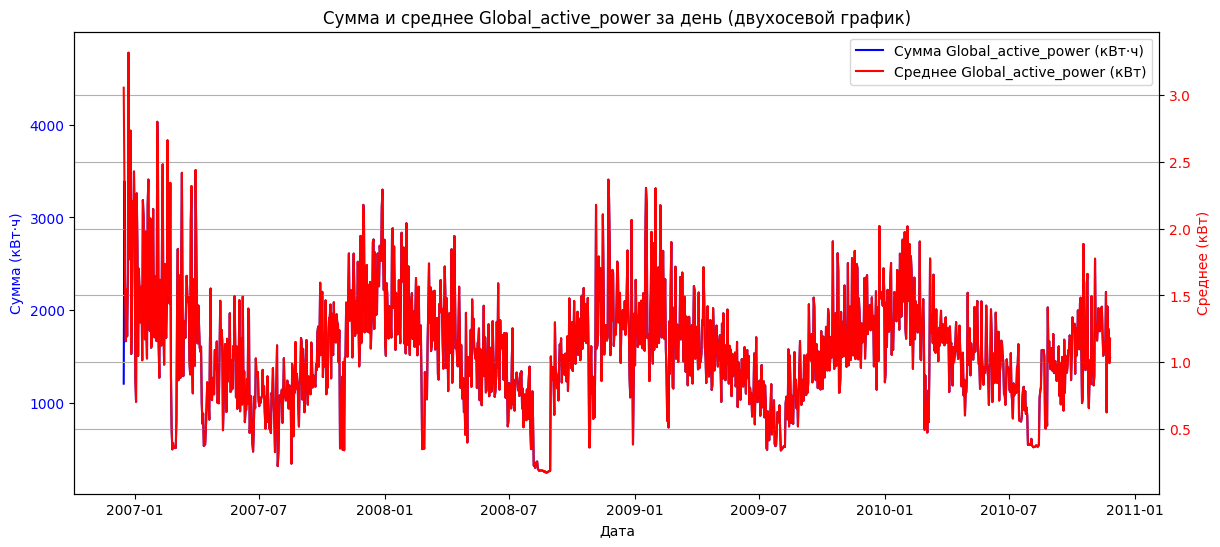

In [14]:
import matplotlib.pyplot as plt

# Ресемплирование по дням: сумма и среднее Global_active_power
daily_power_sum = df['Global_active_power'].resample('D').sum()
daily_power_mean = df['Global_active_power'].resample('D').mean()

plt.figure(figsize=(14,6))
plt.plot(daily_power_sum, label='Сумма Global_active_power (кВт⋅ч)')
plt.plot(daily_power_mean, label='Среднее Global_active_power (кВт)')
plt.title('Сумма и среднее Global_active_power за день')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Ресемплирование Global_intensity — среднее и стандартное отклонение
daily_intensity_mean = df['Global_intensity'].resample('D').mean()
daily_intensity_std = df['Global_intensity'].resample('D').std()

plt.figure(figsize=(14,6))
plt.plot(daily_intensity_mean, label='Среднее Global_intensity (А)')
plt.fill_between(daily_intensity_mean.index,
                 daily_intensity_mean - daily_intensity_std,
                 daily_intensity_mean + daily_intensity_std,
                 color='orange', alpha=0.3, label='Стандартное отклонение')
plt.title('Среднее и стандартное отклонение Global_intensity за день')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

# Двухосевой график суммы и среднего Global_active_power
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(daily_power_sum, color='blue', label='Сумма Global_active_power (кВт⋅ч)')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Сумма (кВт⋅ч)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(daily_power_mean, color='red', label='Среднее Global_active_power (кВт)')
ax2.set_ylabel('Среднее (кВт)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.title('Сумма и среднее Global_active_power за день (двухосевой график)')
plt.grid(True)
plt.show()



# Part 4 : Data Preprocessing for LSTM
# Часть 5: Построение модели LSTM
# Часть 6: Обучение и оценка модели LSTM

X_train shape: (1660147, 60, 1)
y_train shape: (1660147,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
51880/51880 - 306s - 6ms/step - loss: 6.1246e-04 - val_loss: 3.7356e-04
Epoch 2/10
51880/51880 - 363s - 7ms/step - loss: 5.8789e-04 - val_loss: 3.6926e-04
Epoch 3/10
51880/51880 - 339s - 7ms/step - loss: 5.7998e-04 - val_loss: 3.7040e-04
Epoch 4/10
51880/51880 - 361s - 7ms/step - loss: 5.5447e-04 - val_loss: 3.5272e-04
Epoch 5/10
51880/51880 - 344s - 7ms/step - loss: 5.3571e-04 - val_loss: 3.5308e-04
Epoch 6/10
51880/51880 - 342s - 7ms/step - loss: 5.2889e-04 - val_loss: 3.4961e-04
Epoch 7/10
51880/51880 - 381s - 7ms/step - loss: 5.2330e-04 - val_loss: 3.4208e-04
Epoch 8/10
51880/51880 - 382s - 7ms/step - loss: 5.1924e-04 - val_loss: 3.4269e-04
Epoch 9/10
51880/51880 - 380s - 7ms/step - loss: 5.1577e-04 - val_loss: 3.4170e-04
Epoch 10/10
51880/51880 - 381s - 7ms/step - loss: 5.1280e-04 - val_loss: 3.4891e-04


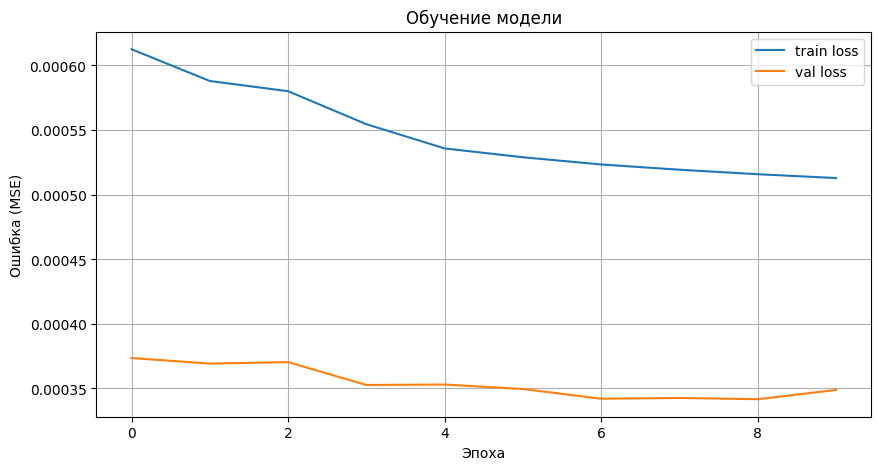

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Предполагаем, что df уже загружен и индекс — Datetime

# 1. Берем нужный столбец и преобразуем в numpy-массив
data = df['Global_active_power'].values.reshape(-1, 1)

# 2. Нормализуем данные в диапазон [0,1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# 3. Делим данные на тренировочную и тестовую выборки (80/20)
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# 4. Создаем функцию для формирования последовательностей с look_back окнами
def create_sequences(dataset, look_back=60):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:i+look_back, 0])
        y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(y)

look_back = 60  # окно из 60 шагов

X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

# 5. Меняем форму входных данных для LSTM: (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

# 6. Создаем простую LSTM-модель
model = Sequential()
model.add(LSTM(32, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.summary()

# 7. Обучаем модель (по 10 эпох, batch_size=32)
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=2
)

# 8. Визуализация процесса обучения
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Обучение модели')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка (MSE)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Предсказываем на X_test
y_pred_scaled = model.predict(X_test)

# Преобразуем обратно к исходному масштабу
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


12969/12969 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step


In [18]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
print(f'RMSE: {rmse:.4f}')


RMSE: 0.2063


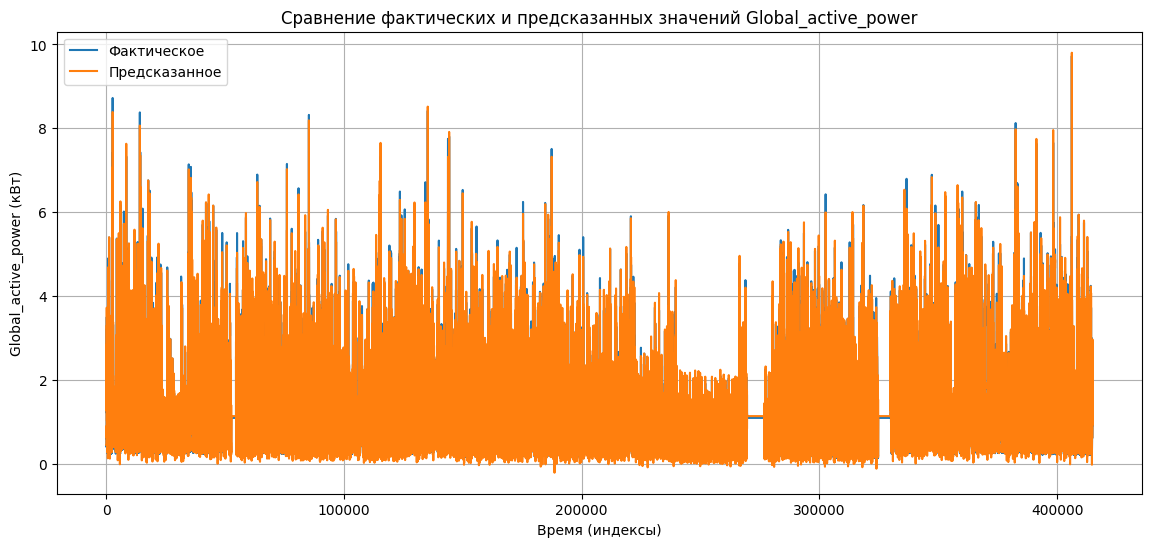

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Фактическое')
plt.plot(y_pred, label='Предсказанное')
plt.title('Сравнение фактических и предсказанных значений Global_active_power')
plt.xlabel('Время (индексы)')
plt.ylabel('Global_active_power (кВт)')
plt.legend()
plt.grid(True)
plt.show()
